In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import mediapipe as mp

In [2]:
img = cv2.imread("pexels-cottonbro-8090149.jpg")
background_img = cv2.imread("white-house.jpg")

(-0.5, 6474.5, 4316.5, -0.5)

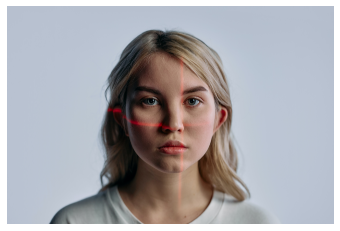

In [3]:
plt.imshow(img[:, :, ::-1])
plt.axis('off')

(-0.5, 2990.5, 1681.5, -0.5)

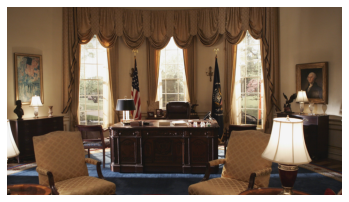

In [4]:
plt.imshow(background_img[:, :, ::-1])
plt.axis('off')

In [5]:
background_img = cv2.resize(background_img, (img.shape[1], img.shape[0]))

In [6]:
BG_COLOR = (255, 215, 0) # gold
MASK_COLOR = (255, 255, 255) # white

In [8]:
mp_selfie_segmentation = mp.solutions.selfie_segmentation
selfie_segmentation = mp_selfie_segmentation.SelfieSegmentation(model_selection=0)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [9]:
results = selfie_segmentation.process(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [10]:
segmentation_mask = results.segmentation_mask

In [11]:
segmentation_mask.shape == img.shape[0:2]

True

In [12]:
condition = np.stack((segmentation_mask,) * 3, axis=-1) > 0.1

# Segmentation of person and background areas

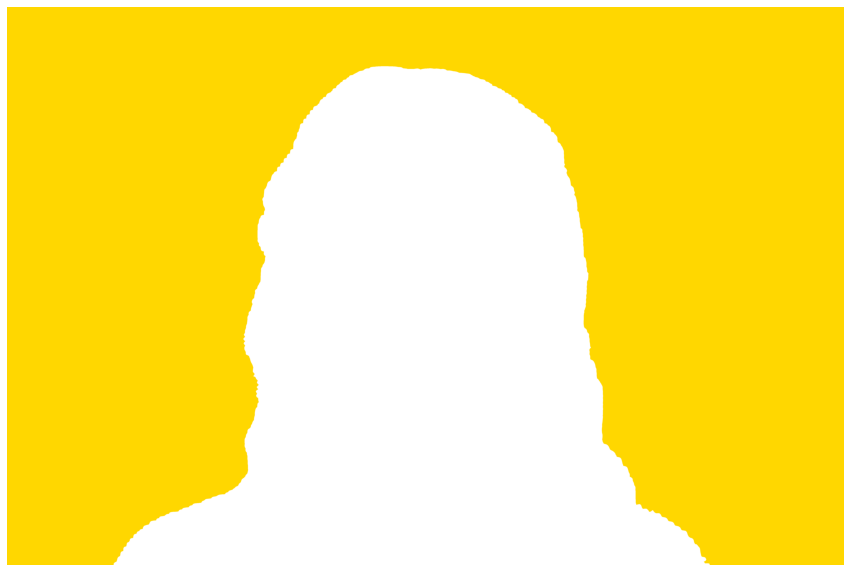

In [18]:
fg_image = np.zeros(img.shape, dtype=np.uint8)
fg_image[:] = MASK_COLOR

bg_image = np.zeros(img.shape, dtype=np.uint8)
bg_image[:] = BG_COLOR

output_image = np.where(condition, fg_image, bg_image)

fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(output_image)

# Set golden color to the background area

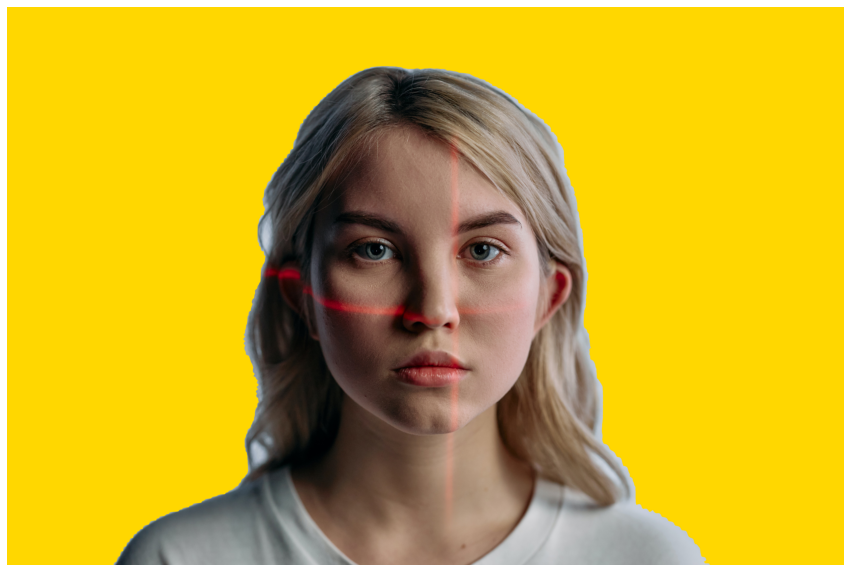

In [15]:
fig = plt.figure(figsize = (15, 15))
output_image = np.where(condition, img[:, :, ::-1], BG_COLOR)
plt.axis('off')
plt.imshow(output_image)

# Blur the background

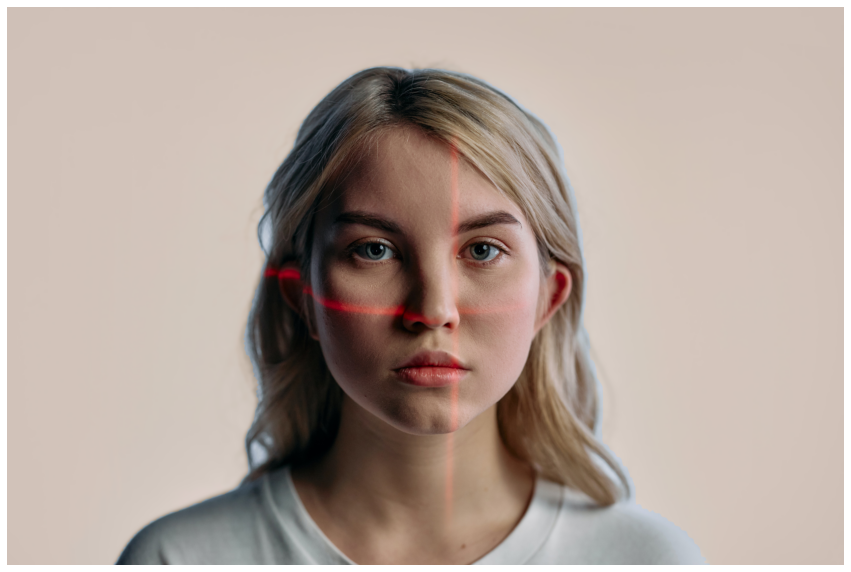

In [16]:
blurred_image = cv2.GaussianBlur(img,(55,55),0)
output_image = np.where(condition, img[:, :, ::-1], blurred_image)

fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(output_image)

# Set virtual background to the White House

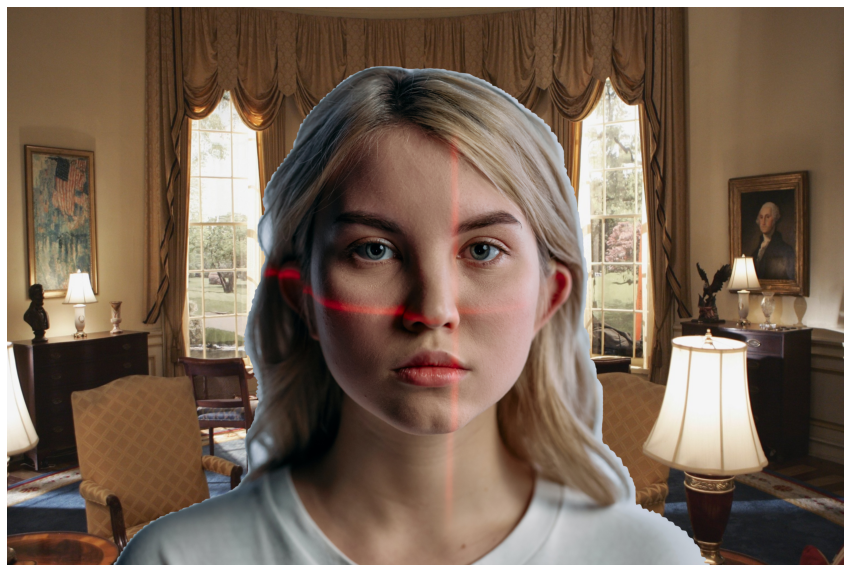

In [17]:
output_image = np.where(condition, img[:, :, ::-1], background_img[:, :, ::-1])

fig = plt.figure(figsize = (15, 15))
plt.axis('off')
plt.imshow(output_image)